<a href="https://colab.research.google.com/github/himanshkr03/Data-Visualization-Techniques/blob/main/Data_Visualization_Techniques_Scalar%2C_Vector%2C_and_Multi_dimensional_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualization Techniques: Scalar, Vector, and Multi-dimensional Methods**

**Code Implementation for Data Visualization Techniques**

# **1. Setup & Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
print("Libraries imported!")

Libraries imported!


In [2]:
df1 = pd.read_csv("/content/household_power_consumption.txt")

df1.to_csv('household_power_consumption.csv',index = None)

In [3]:
# Load data
#Access Dataset : https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption
url = "/content/household_power_consumption.csv"
df = pd.read_csv(url, sep=';', parse_dates={'DateTime': ['Date', 'Time']},
                 infer_datetime_format=True, low_memory=False, na_values=['?'])

# Preprocessing
df = df.dropna().sample(frac=0.1, random_state=42)  # Downsample for demo
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
df['Hour'] = df['DateTime'].dt.hour

<ipython-input-3-d7f57f4ae98e>:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(url, sep=';', parse_dates={'DateTime': ['Date', 'Time']},
<ipython-input-3-d7f57f4ae98e>:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(url, sep=';', parse_dates={'DateTime': ['Date', 'Time']},
<ipython-input-3-d7f57f4ae98e>:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(url, sep=';', parse_dates={'DateTime': ['Date', 'Time']},


In [4]:
df.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour
1030580,2008-12-01 09:44:00,1.502,0.074,240.17,6.4,0.0,0.0,18.0,9
1815,2006-12-17 23:39:00,0.374,0.264,245.50,1.8,0.0,2.0,0.0,23
1295977,2009-06-03 17:01:00,0.620,0.300,239.85,3.0,0.0,1.0,1.0,17
206669,2007-05-09 05:53:00,0.280,0.200,235.72,1.4,0.0,0.0,0.0,5
1048893,2008-12-14 02:57:00,1.372,0.054,243.95,5.6,0.0,0.0,18.0,2


# **2. Scalar Visualizations**

**A. Heatmap (Daily Power Patterns)**


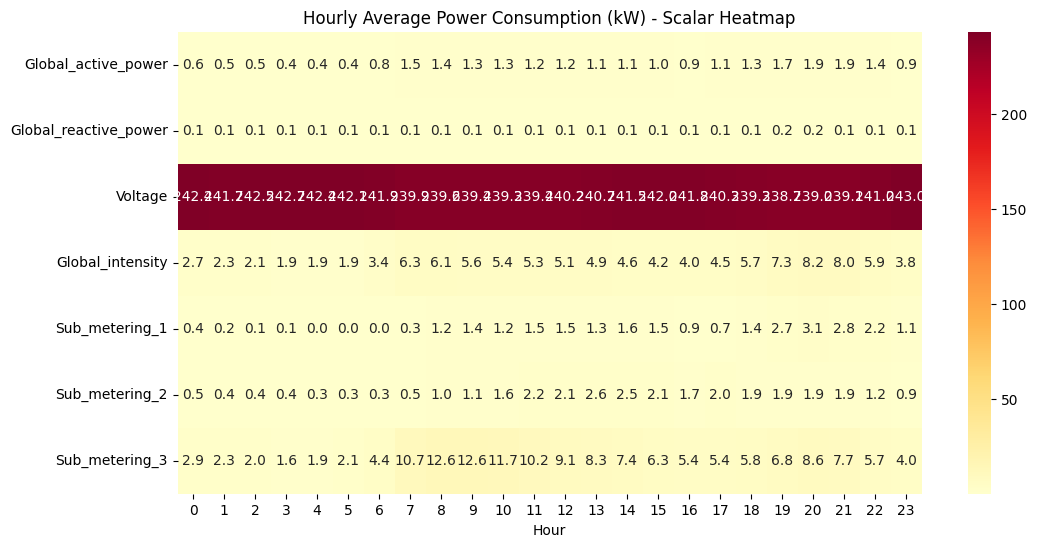

In [5]:
daily_avg = df.groupby('Hour')[numeric_cols].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(daily_avg.T, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("Hourly Average Power Consumption (kW) - Scalar Heatmap")
plt.show()

**B. Time Series (Global Active Power)**

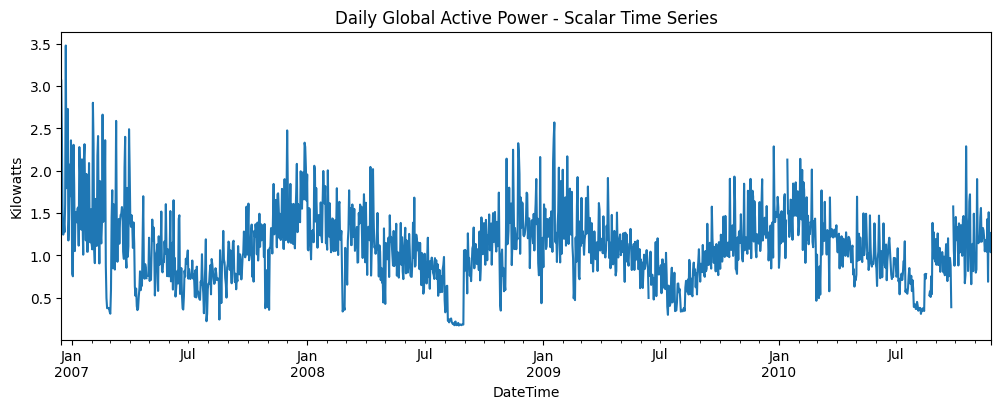

In [6]:
plt.figure(figsize=(12, 4))
df.set_index('DateTime')['Global_active_power'].resample('D').mean().plot()
plt.ylabel('Kilowatts')
plt.title("Daily Global Active Power - Scalar Time Series")
plt.show()

**C. Multi-Trend Heatmap (Daily & Hourly Power)**

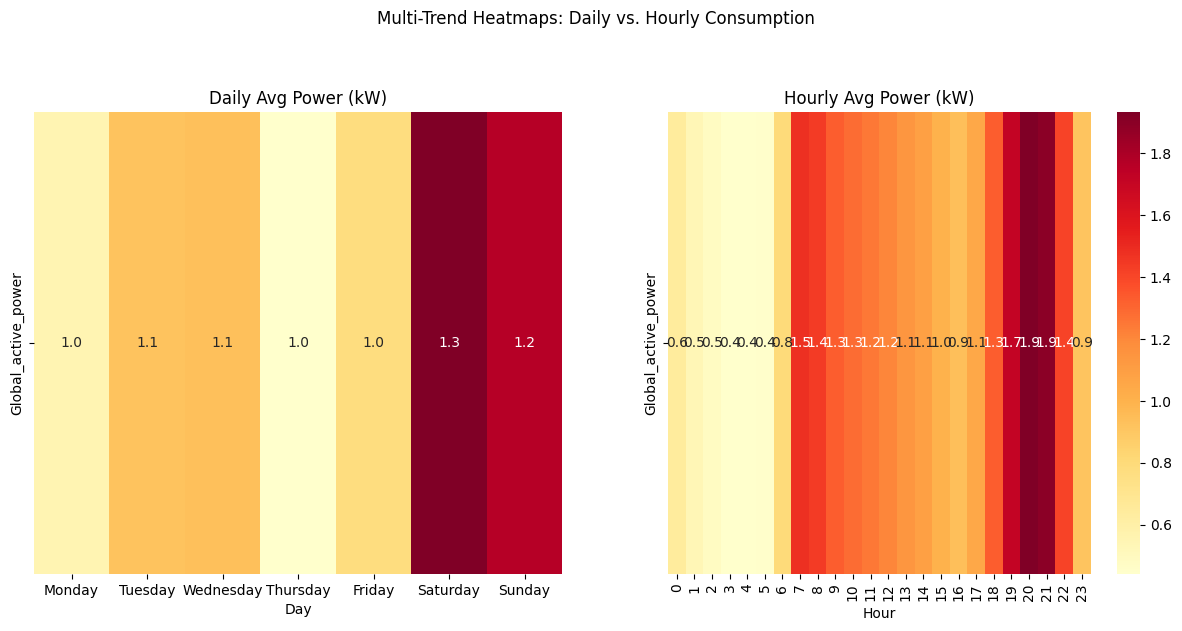

In [7]:
# Daily and Hourly trends
plt.figure(figsize=(15, 6))

# Daily trend
plt.subplot(1, 2, 1)
# Extract day of the week from 'DateTime' column
df['Day'] = df['DateTime'].dt.day_name()
daily_avg = df.groupby('Day')['Global_active_power'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
sns.heatmap(daily_avg.to_frame().T, cmap="YlOrRd", annot=True, fmt=".1f", cbar=False)
plt.title("Daily Avg Power (kW)")

# Hourly trend
plt.subplot(1, 2, 2)
hourly_avg = df.groupby('Hour')['Global_active_power'].mean()
sns.heatmap(hourly_avg.to_frame().T, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("Hourly Avg Power (kW)")

plt.suptitle("Multi-Trend Heatmaps: Daily vs. Hourly Consumption", y=1.05)
plt.show()

**D. Contour Plot (Voltage vs. Time)**

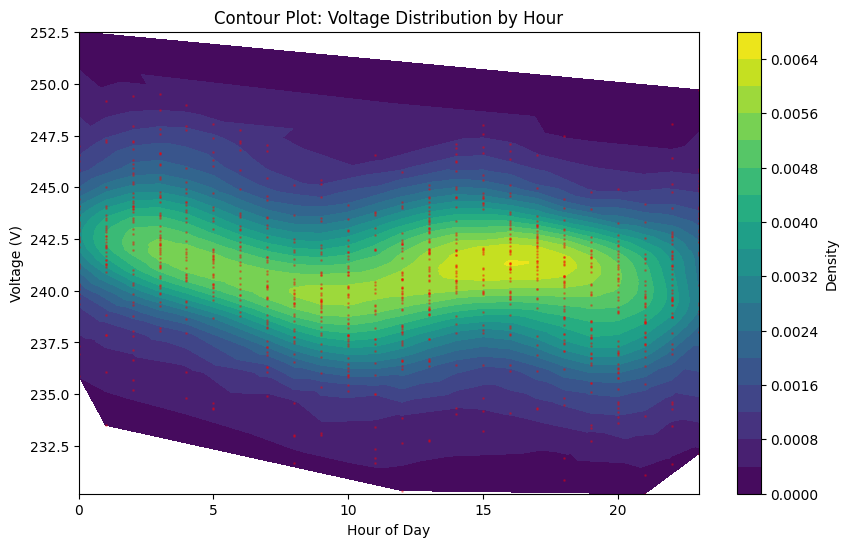

In [8]:
from scipy.stats import gaussian_kde

# Sample data for performance
sample = df.sample(1000)

# Kernel Density Estimation
x = sample['Hour']
y = sample['Voltage']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

plt.figure(figsize=(10, 6))
plt.tricontourf(x, y, z, levels=15, cmap="viridis")
plt.colorbar(label="Density")
plt.scatter(x, y, c='red', s=1, alpha=0.3)
plt.title("Contour Plot: Voltage Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Voltage (V)")
plt.show()

**E. Horizon Graphs**

<Figure size 1200x600 with 0 Axes>

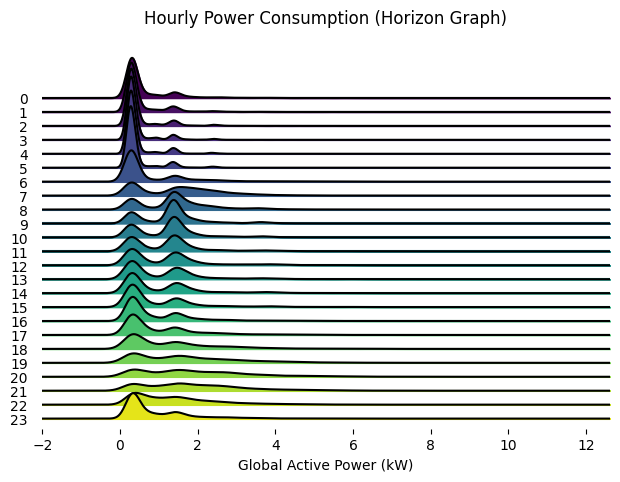

In [9]:
!pip install joypy
import joypy
import matplotlib.pyplot as plt # Make sure matplotlib.pyplot is imported

plt.figure(figsize=(12, 6))
joypy.joyplot(
    df,
    by='Hour',
    column='Global_active_power',
    colormap=plt.cm.viridis, # Changed to plt.cm.viridis
    title="Hourly Power Consumption (Horizon Graph)"
)
plt.xlabel("Global Active Power (kW)")
plt.show()

**F. Hexagonal Binning**

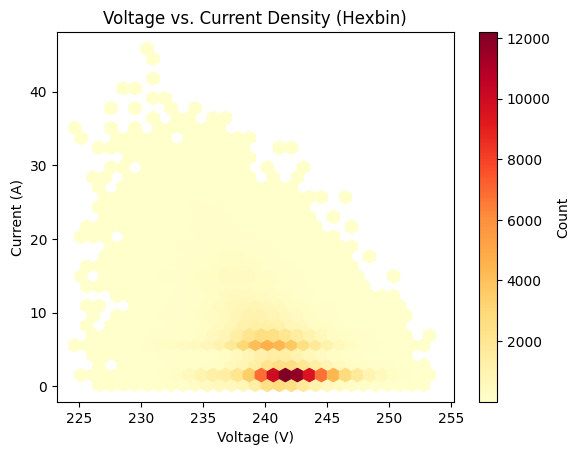

In [10]:
plt.hexbin(
    df['Voltage'],
    df['Global_intensity'],
    gridsize=30,
    cmap='YlOrRd',
    mincnt=1
)
plt.colorbar(label='Count')
plt.title("Voltage vs. Current Density (Hexbin)")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.show()

# **3. Vector Visualizations**

**A. Arrow Plot (Active vs. Reactive Power)**

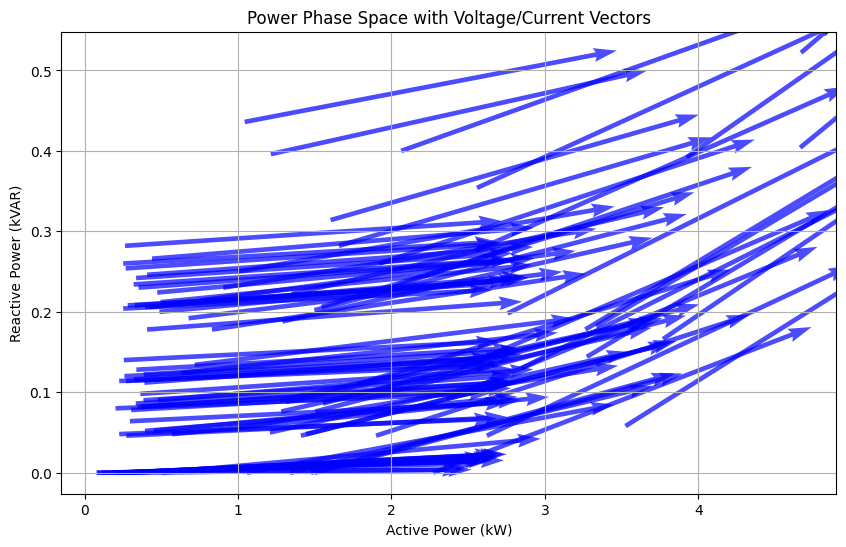

In [11]:
# Resample to reduce clutter
sample = df.sample(100)

plt.figure(figsize=(10, 6))
plt.quiver(
    sample['Global_active_power'],
    sample['Global_reactive_power'],
    sample['Voltage'] / 10,  # Scale for visibility
    sample['Global_intensity'],
    scale=50, color='blue', alpha=0.7
)
plt.xlabel("Active Power (kW)")
plt.ylabel("Reactive Power (kVAR)")
plt.title("Power Phase Space with Voltage/Current Vectors")
plt.grid()
plt.show()

**B. Streamlines (Sub-metering Relationships)**

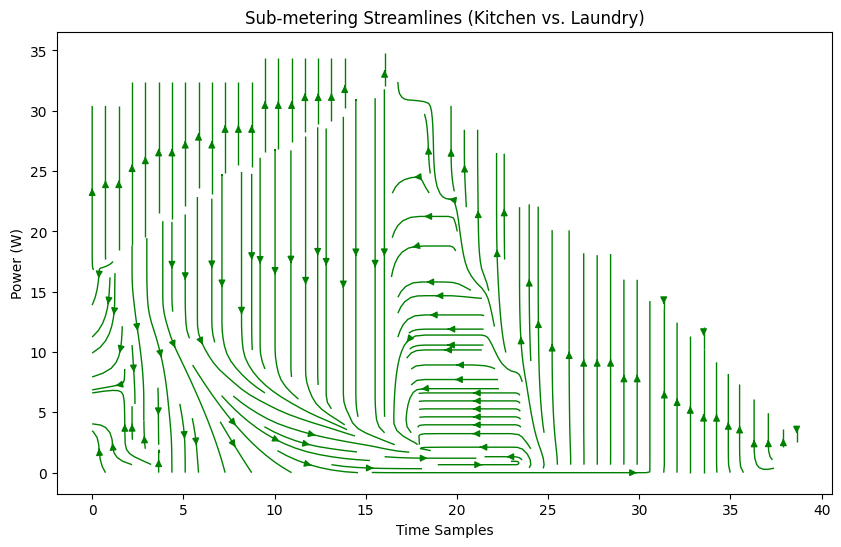

In [12]:
x = df['Sub_metering_1'].values[:500]
y = df['Sub_metering_2'].values[:500]
u = np.gradient(x)  # Rate of change
v = np.gradient(y)

# Create a grid for streamplot
# This ensures 'u' and 'v' will match the grid shape
xi = np.linspace(x.min(), x.max(), 25)
yi = np.linspace(y.min(), y.max(), 20)
X, Y = np.meshgrid(xi, yi)

# Interpolate 'u' and 'v' onto the grid
from scipy.interpolate import griddata
U = griddata((x, y), u, (X, Y), method='linear')
V = griddata((x, y), v, (X, Y), method='linear')


plt.figure(figsize=(10, 6))
# Use the grid and interpolated values for streamplot
plt.streamplot(X, Y, U, V, density=2, color='green', linewidth=1)

plt.title("Sub-metering Streamlines (Kitchen vs. Laundry)")
plt.xlabel("Time Samples")
plt.ylabel("Power (W)")
plt.show()

**C. Vector Field Topology**

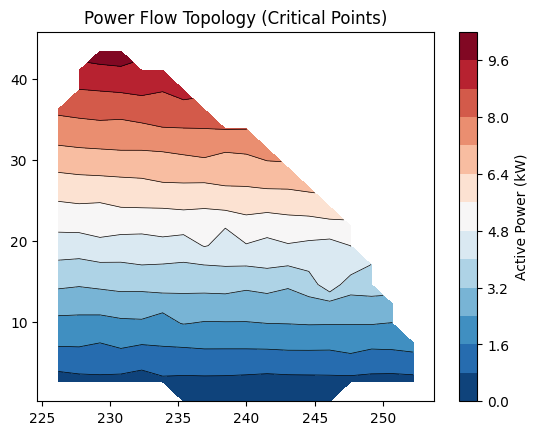

In [13]:
from scipy.interpolate import griddata

# Create grid for topology analysis
xi = np.linspace(df['Voltage'].min(), df['Voltage'].max(), 20)
yi = np.linspace(df['Global_intensity'].min(), df['Global_intensity'].max(), 20)
zi = griddata(
    (df['Voltage'], df['Global_intensity']),
    df['Global_active_power'],
    (xi[None,:], yi[:,None]),
    method='cubic'
)

plt.contour(xi, yi, zi, levels=15, linewidths=0.5, colors='k')
plt.contourf(xi, yi, zi, levels=15, cmap="RdBu_r")
plt.title("Power Flow Topology (Critical Points)")
plt.colorbar(label="Active Power (kW)")
plt.show()

# **3. Multi-Dimensional Visualizations**

**A. Parallel Coordinates (All Power Metrics)**

In [14]:
metrics = ['Global_active_power', 'Global_reactive_power',
           'Voltage', 'Global_intensity', 'Sub_metering_1']

fig = px.parallel_coordinates(
    df.sample(1000),
    dimensions=metrics,
    color='Global_active_power',
    color_continuous_scale=px.colors.diverging.Tealrose
)
fig.update_layout(
    title="Parallel Coordinates: Power Metrics Relationships",
    height=500
)
fig.show()

**B. Scatterplot Matrix (SPLOM)**

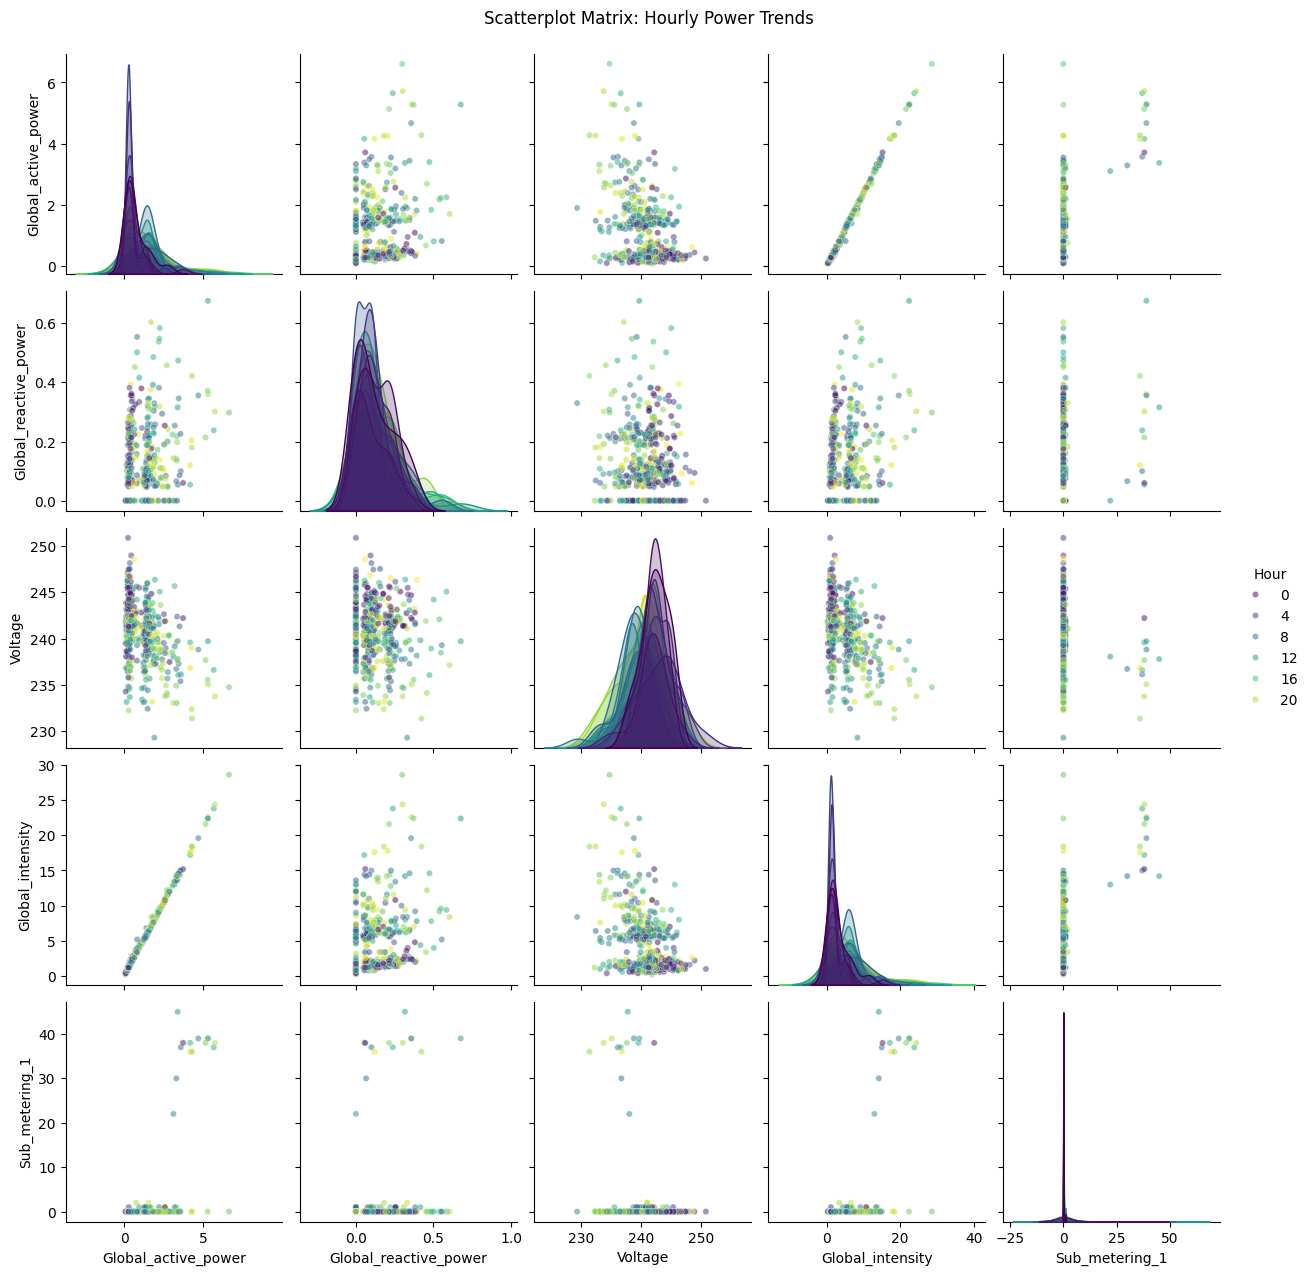

In [15]:
sns.pairplot(
    df[metrics + ['Hour']].sample(500),
    hue='Hour', palette="viridis",
    plot_kws={'alpha': 0.5, 's': 20}
)
plt.suptitle("Scatterplot Matrix: Hourly Power Trends", y=1.02)
plt.show()

**C. RadViz (Radial Coordinates)**

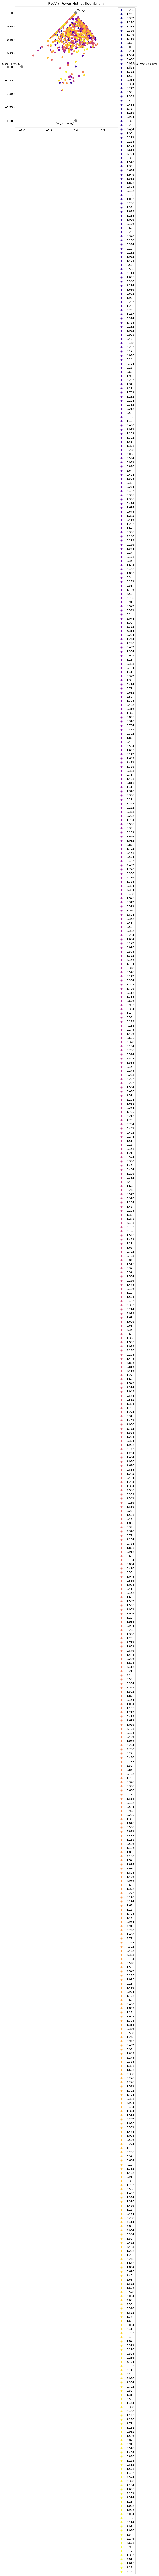

In [17]:
from pandas.plotting import radviz

plt.figure(figsize=(8, 8))
radviz(df.sample(1000)[metrics], 'Global_active_power', colormap='plasma')
plt.title("RadViz: Power Metrics Equilibrium")
plt.show()

**D. Chernoff Faces**

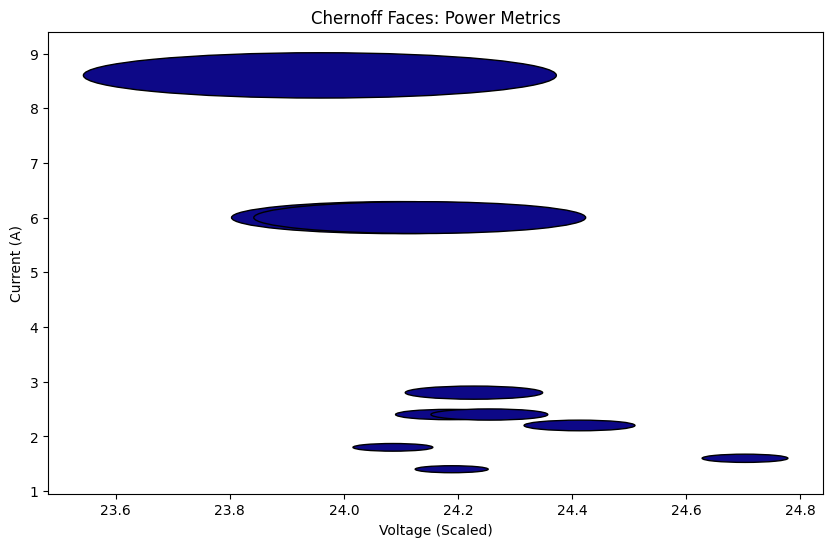

In [19]:
from matplotlib import patches
from matplotlib.collections import PatchCollection

# Simplified example (full impl. requires facegen lib)
fig, ax = plt.subplots(figsize=(10, 6))
faces = []
for _, row in df.sample(10).iterrows():
    face = patches.Circle(
        (row['Voltage']/10, row['Global_intensity']),
        radius=row['Global_active_power']/5,
        ec='k',
        fc=plt.cm.plasma(row['Sub_metering_1']/4)
    )
    faces.append(face)

ax.add_collection(PatchCollection(faces, match_original=True))
ax.autoscale_view()
plt.title("Chernoff Faces: Power Metrics")
plt.xlabel("Voltage (Scaled)")
plt.ylabel("Current (A)")
plt.show()